# Øving 7

Start by plotting the metric score of the kmeans by the k number of clusters, between 2 and 30. We find the optimal number of clusters where the score is the highest.  

Max: 0.2887 at k=8


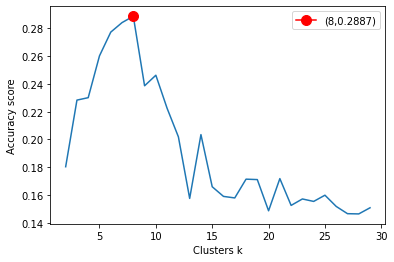

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

file = pd.read_csv("dataset/agaricus-lepiota.csv")

file_dummies = pd.get_dummies(file, columns=file.columns.values)
X = file_dummies.values

start = 2

runs = 30

points = np.empty((runs - start),)

for k in range(start, runs):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(X)
    points[k - start] = np.array([silhouette_score(X, kmeans.labels_, metric='euclidean')])

# Visualise the different accuracies at k=2...30
m = np.amax(points, axis=0)
k = points.argmax() + start
print("Max: %.4f at k=%i" % (m, k))
plt.figure()
plt.plot(range(start, runs), points)
label = '(%i,%.4f)' % (k, m)
plt.plot([k], [m], c='red', marker='o', markersize=10, label=label)
plt.xlabel('Clusters k')
plt.ylabel('Accuracy score')
plt.legend()


Next, we use the optimal number of clusters in to select the number of features needed from a PCA, before plotting the result. 

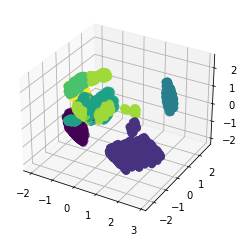

In [5]:
# use PCA to select features
pca = PCA(n_components=k)
X_PCA = pca.fit_transform(X)

# Visualise the data using PCA from the best K
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_PCA)
y_kmeans = kmeans.predict(X_PCA)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], zs = X_PCA[:, 2], c=y_kmeans, s=50, cmap='viridis')
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], zs = centers[:, 2], c='black', s=1000, alpha=0.5)
plt.show()